In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Linear and Logistic Regression

- Regression is a technique for supervised learning that is based on strong statistical assumptions about the underlying data. Linear and logistic regression are just two different assumptions on the data
- Regression can be used when the assumptions are not met, but then it needs to be graded based on _performance on the test data_. P-values, F-scores, etc.. depend on the assumptions being true.

## Linear Regression

Let $y \in \mathbb{R}$ be a random variable (the target) and $X = x_1, \ldots, x_p$ be a set of _independent_ variables (the predictors). Then
$$
y \sim \cal{N}(\mu, \sigma)
$$
where 
$$
\mu = \mu(X) = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_p x_p
$$

### Linear Regression Test Data

Let's generate some sample data that matches the assumptions exactly.

1. Set p = 3
2. Choose a formula for $\mu(X)$
$$
\mu(X) = 5 - 9 x_1 + 3 x_2 + 2 x_3
$$

Features

In [3]:
X = pd.DataFrame(np.random.rand(100, 3))

In [4]:
X.head()

,0,1,2
0,0.299864,0.452976,0.775562
1,0.178775,0.554150,0.179959
2,0.386781,0.322026,0.319072
3,0.900669,0.070920,0.672951
4,0.721173,0.268577,0.798656


The target is a linear function of the features, plus some gaussian noise.

In [12]:
np.random.normal(1, 1)

2.8890130302210597

In [25]:
sigma = .1
def make_target(row, sigma):
    x, y, z = row[0], row[1], row[2]
    mu = 5 - 9*x + 3*y + 2*z
    return np.random.normal(mu, sigma)
X['target'] = X.apply(lambda row: make_target(row, sigma), axis=1)

In [26]:
X.head()

,0,1,2,target
0,0.299864,0.452976,0.775562,5.113813
1,0.178775,0.554150,0.179959,5.295962
2,0.386781,0.322026,0.319072,3.306948
3,0.900669,0.070920,0.672951,-1.612139
4,0.721173,0.268577,0.798656,0.718802


### Recover the formula using linear regression

In [27]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X.iloc[:,:-1], X['target'])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
linreg.intercept_

4.9590781669428692

In [29]:
linreg.coef_

array([-8.9722653 ,  3.00459474,  1.99699937])

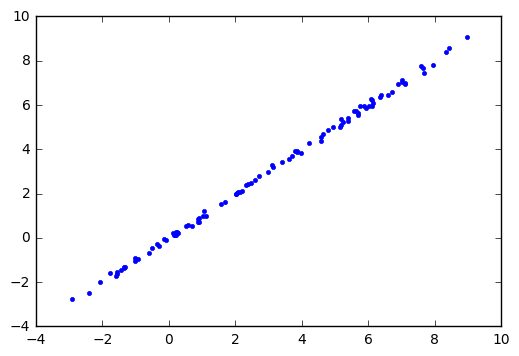

In [30]:
# Plot predicted vs actual
pred = linreg.predict(X.iloc[:, :-1])
plt.plot(pred, X['target'], '.')

## Logistic Regression

Let $y \in \{0, 1\}$ be a random variable (the target) and $X = x_1, \ldots, x_n$ be a set of _independent_ variables (the predictors). Then
$$
y \sim \cal{Ber}(p)
$$
where
$$
p = p(X) = f(w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_n x_n)
$$
and $f$ is the _logistic function_
$$
f(t) = \frac{1}{1 + e^{-t}}
$$

### Logistic Regression Test Data

Let's generate some sample data that matches the assumptions exactly.

1. Set n = 3
2. Choose a formula for $p(X)$
$$
p(X) = f(5 - 9 x_1 + 3 x_2 + 2 x_3)
$$

#### Exercise: Generate logistic regression data according to the model above.

In [31]:
X.head()

,0,1,2,target
0,0.299864,0.452976,0.775562,5.113813
1,0.178775,0.554150,0.179959,5.295962
2,0.386781,0.322026,0.319072,3.306948
3,0.900669,0.070920,0.672951,-1.612139
4,0.721173,0.268577,0.798656,0.718802


In [32]:
del X['target']

In [33]:
X.head()

,0,1,2
0,0.299864,0.452976,0.775562
1,0.178775,0.554150,0.179959
2,0.386781,0.322026,0.319072
3,0.900669,0.070920,0.672951
4,0.721173,0.268577,0.798656


In [34]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

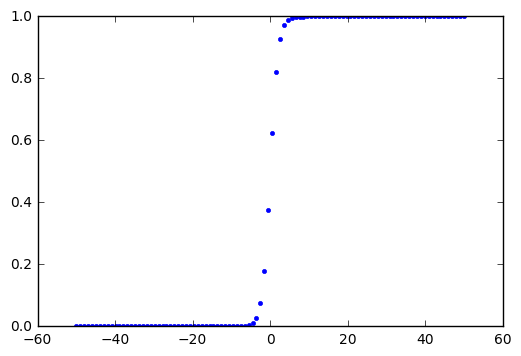

In [36]:
pts = np.linspace(-50, 50, 100)
sig = sigmoid(pts)
plt.plot(pts, sig, '.')

In [37]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

def make_target_logistic(row):
    """
    Return either 0 or 1, according to a Bernoulli distribution defined by row.
    """
    x, y, z = row[0], row[1], row[2]
    p = sigmoid(5 - 9*x + 5*y + 3*z)
    return np.random.binomial(1, p)

X['target'] = X.apply(lambda row: make_target_logistic(row), 1)

In [38]:
X.head()

,0,1,2,target
0,0.299864,0.452976,0.775562,1
1,0.178775,0.554150,0.179959,1
2,0.386781,0.322026,0.319072,1
3,0.900669,0.070920,0.672951,0
4,0.721173,0.268577,0.798656,1


#### Recover coefficients

In [39]:
from sklearn.linear_model import LogisticRegression

# Fit logistic model
logit = LogisticRegression(C=1e18)
logit.fit(X.iloc[:,:-1], X['target'])

print 'Intercept: {:.3}'.format(logit.intercept_)

print 'Coeffs: ', logit.coef_

print 'Accuracy: {:.3}'.format(logit.score(X.iloc[:, :-1], X['target']))

Intercept: [ 6
Coeffs:  [[-9.52198153  3.90149029  3.09366811]]
Accuracy: 0.89


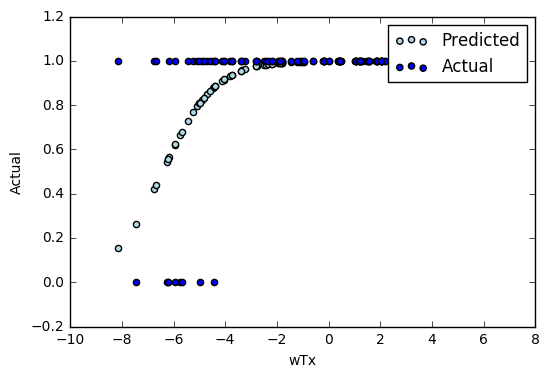

In [42]:
results = pd.DataFrame({
        'wTx': X.apply(lambda row: np.dot(row[:3], logit.coef_.flatten()), axis=1),
        'Predicted Probability': logit.predict_proba(X.iloc[:, :-1])[:,1],
        'Actual': X['target']
    })

ax = results.plot(x='wTx', y='Predicted Probability', kind='scatter', 
                  label = 'Predicted', color='lightblue')
results.plot(x='wTx', y='Actual', kind='scatter', ax=ax, label='Actual')

# Regularization

For any type of regression, one learns the model parameters by:

1. Assume the probabilistic model is correct.
2. Compute the _likelihood_ of each data point for a given set of parameters $w_0, \ldots, w_p$. (just evaluate the PDF at that point and target value)
3. Choose the set of parameters that maximizes the total likelihood. (or, equivalently, minimizes the log-likelihood)

For linear regression, it turns out that ${\cal l} (X) \sim ||w^T x - y||^2$. So maximizing the likelihood is the same as minimizing the mean-squared error.

For logistic regression,
$$
{\cal l} (x) := -y \log(f(w^T x)) - (1 - y) \log(1 - f(w^Tx))
$$

In either case, regularization just means that instead of directly minimizing ${\cal L}(X)$, we also add a penalty on the size of coefficients.

#### L1 (Lasso) Regularization

Find $w$ that minimizes 
$$
{\cal l}(X) + \lambda \sum_{i=1}^p |w_i|
$$

#### L2 (Ridge) Regularization

Find $w$ that minimizes 
$$
{\cal l}(X) + \lambda \sum_{i=1}^p ||w_i||^2
$$

#### Elastic Net Regularization

Find $w$ that minimizes 
$$
{\cal l}(X) + (1 - \alpha) \cdot \lambda \sum_{i=1}^p |w_i|^2 + \alpha \cdot \lambda \sum_{i=1}^p ||w_i||
$$

# Application: Crime Data

In [43]:
from sklearn.model_selection import train_test_split

# Load some crime data
headers = pd.read_csv('comm_names.txt', squeeze=True)
headers = headers.apply(lambda s: s.split()[1])
crime = (pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data', 
                    header=None, na_values=['?'], names=headers)
         .iloc[:, 5:]
         .dropna()
         )

# Set target and predictors
target = 'ViolentCrimesPerPop'
predictors = [c for c in crime.columns if not c == target]

# Train/test split
train_df, test_df = train_test_split(crime, random_state=2)

In [47]:
target

'ViolentCrimesPerPop'

In [48]:
predictors

['householdsize',
 'racepctblack',
 'racePctWhite',
 'racePctAsian',
 'racePctHisp',
 'agePct12t21',
 'agePct12t29',
 'agePct16t24',
 'agePct65up',
 'numbUrban',
 'pctUrban',
 'medIncome',
 'pctWWage',
 'pctWFarmSelf',
 'pctWInvInc',
 'pctWSocSec',
 'pctWPubAsst',
 'pctWRetire',
 'medFamInc',
 'perCapInc',
 'whitePerCap',
 'blackPerCap',
 'indianPerCap',
 'AsianPerCap',
 'OtherPerCap',
 'HispPerCap',
 'NumUnderPov',
 'PctPopUnderPov',
 'PctLess9thGrade',
 'PctNotHSGrad',
 'PctBSorMore',
 'PctUnemployed',
 'PctEmploy',
 'PctEmplManu',
 'PctEmplProfServ',
 'PctOccupManu',
 'PctOccupMgmtProf',
 'MalePctDivorce',
 'MalePctNevMarr',
 'FemalePctDiv',
 'TotalPctDiv',
 'PersPerFam',
 'PctFam2Par',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctWorkMomYoungKids',
 'PctWorkMom',
 'NumIlleg',
 'PctIlleg',
 'NumImmig',
 'PctImmigRecent',
 'PctImmigRec5',
 'PctImmigRec8',
 'PctImmigRec10',
 'PctRecentImmig',
 'PctRecImmig5',
 'PctRecImmig8',
 'PctRecImmig10',
 'PctSpeakEnglOnly',
 'PctNo

In [46]:
train_df.head()

,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
54,0.23,0.28,0.76,0.08,0.01,0.32,0.37,0.22,0.61,0.09,...,0.08,0.16,0.29,0.09,0.01,0.56,0.0,1.00,0.12,0.56
41,0.58,0.01,0.83,0.13,0.21,0.44,0.49,0.29,0.25,0.06,...,0.05,0.16,0.20,0.06,0.04,0.22,0.5,0.59,0.48,0.09
13,0.47,0.74,0.37,0.08,0.05,0.49,0.57,0.40,0.34,0.27,...,0.63,0.07,0.08,0.37,0.04,0.74,0.5,0.84,0.09,0.25
1,0.45,0.83,0.34,0.04,0.01,0.48,0.53,0.36,0.37,0.30,...,0.39,0.12,0.09,0.04,0.01,0.00,0.0,0.36,0.01,0.35
19,0.43,0.04,0.89,0.09,0.06,0.45,0.48,0.31,0.46,0.13,...,0.16,0.12,0.07,0.04,0.01,0.81,1.0,0.56,0.09,0.63


In [45]:
test_df.shape

(80, 122)

## Exercise: 

1. Fit a linear regression model on train_df. The goal is to predict 'ViolentCrimesPerPop' from the other columns. What is the r-squared on the train data? What about the test data?
2. Also fit each of a ridge, lasso, and elastic net regression on the same data. Use the functions RidgeCV, LassoCV, and ElasticNetCV to cross-validate and find the best values of $\lambda$ and $\alpha$.
3. Which model performs the best?

### Linear Regression

### Ridge

### Lasso

### Elastic Net

## Exercise:

1. Make the following scatterplot
    - Each point corresponds to one predictor in the data
    - The x-value is the coefficient of that predictor under OLS regression
    - The y-value is the coefficient of that predictor using ridge regularization
2. Do the same for OLS vs Lasso, and OLS vs ElasticNet

## Question: 

What is the story with the two 'large coefficients' found by OLS that are squashed by regularization? (You may have to do some digging)

## Question:

Can we tell from this process which predictors are _the most important_ for predicting violent crimes?